# 02d - TS2 Segmentation Demo

Load and segment the TS2_alone.obj mesh from the data directory using DISCOS's mesh segmentation capabilities.

 graph](00_demo_index.ipynb)

## Setup

In [5]:
import numpy as np
import trimesh
from DISCOS import MeshManager, MeshSegmenter
from DISCOS.utils import data_path

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Load TS2 Mesh

In [8]:
# Load the TS2 mesh from the data directory
mesh_path = data_path("TS2_alone.obj")

ts_mesh = MeshManager(trimesh.load(mesh_path))
ts_mesh.repair_mesh()
ts_mesh.print_mesh_analysis()
ts_mesh.visualize_mesh_slice_interactive()


🔧 Mesh Repair Summary:
  • Inverted faces to fix negative volume: -3199890.36 → 3199890.36
  • Successfully filled holes - mesh is now watertight
  • Applied final mesh processing and validation

📊 Final Mesh Status:
  • Volume: 3764800.466500009
  • Watertight: True
  • Winding consistent: True
  • Faces: 2008
  • Vertices: 1004
Mesh Analysis Report

Geometry:
  * Vertices: 1004
  * Faces: 2008
  * Components: 1
  * Volume: 3764800.47
  * Bounds: [8691.5, 2650.3, 2275.4] to [9000.1, 2921.7, 2734.7]

Mesh Quality:
  * Watertight: True
  * Winding Consistent: True
  * Normal Direction: outward
  * Duplicate Vertices: 0
  * Degenerate Faces: 0

Topology:
  * Genus: 1
  * Euler Characteristic: 0

No issues detected

Recommendation:
  Mesh appears to be in good condition.


## Segmentation

In [15]:
# Create segmenter and segment the TS2 mesh
z_min, z_max = ts_mesh.bounds['z']
z_range = z_max - z_min
slice_height = z_range // 20
segmenter = MeshSegmenter()
segments = segmenter.segment_mesh(ts_mesh.mesh, slice_height=slice_height)

print(f"🎉 TS2 Segmentation Results:")
print(f"  Total segments: {len(segments)}")
print(f"  Total slices: {len(segmenter.slices)}")

# Analyze multi-component slices
multi_component_slices = 0
for i, slice_info in enumerate(segmenter.slices):
    slice_segments = [s for s in segments if s.slice_index == i]
    if len(slice_segments) > 1:
        multi_component_slices += 1
        print(f"  Slice {i}: {len(slice_segments)} segments (multi-component)")

print(f"\n🔬 Topology Analysis:")
print(f"  Slices with multiple segments: {multi_component_slices}")
if len(segmenter.slices) > 0:
    max_segments_per_slice = max(len([s for s in segments if s.slice_index == i]) for i in range(len(segmenter.slices)))
    print(f"  Maximum segments per slice: {max_segments_per_slice}")

# Volume validation
total_volume = sum(seg.volume for seg in segments)
volume_conservation = (total_volume / ts_mesh.mesh.volume) * 100
print(f"  Volume conservation: {volume_conservation:.1f}%")

✅ Validated single-hull mesh: 2008 external faces, volume=3764800.467
Computing 20 cross-sections from z=2275.40 to z=2734.70
  Cross-section 0: z=2297.40, 72 line segments, area=0.000
  Cross-section 1: z=2319.40, 84 line segments, area=0.000
  Cross-section 2: z=2341.40, 77 line segments, area=0.000
  Cross-section 3: z=2363.40, 77 line segments, area=0.000
  Cross-section 4: z=2385.40, 68 line segments, area=0.000
  Cross-section 5: z=2407.40, 68 line segments, area=0.000
  Cross-section 6: z=2429.40, 80 line segments, area=0.000
  Cross-section 7: z=2451.40, 88 line segments, area=0.000
  Cross-section 8: z=2473.40, 88 line segments, area=0.000
  Cross-section 9: z=2495.40, 100 line segments, area=0.000
  Cross-section 10: z=2517.40, 114 line segments, area=0.000
  Cross-section 11: z=2539.40, 133 line segments, area=0.000
  Cross-section 12: z=2561.40, 179 line segments, area=0.000
  Cross-section 13: z=2583.40, 176 line segments, area=0.000
  Cross-section 14: z=2605.40, 214 line

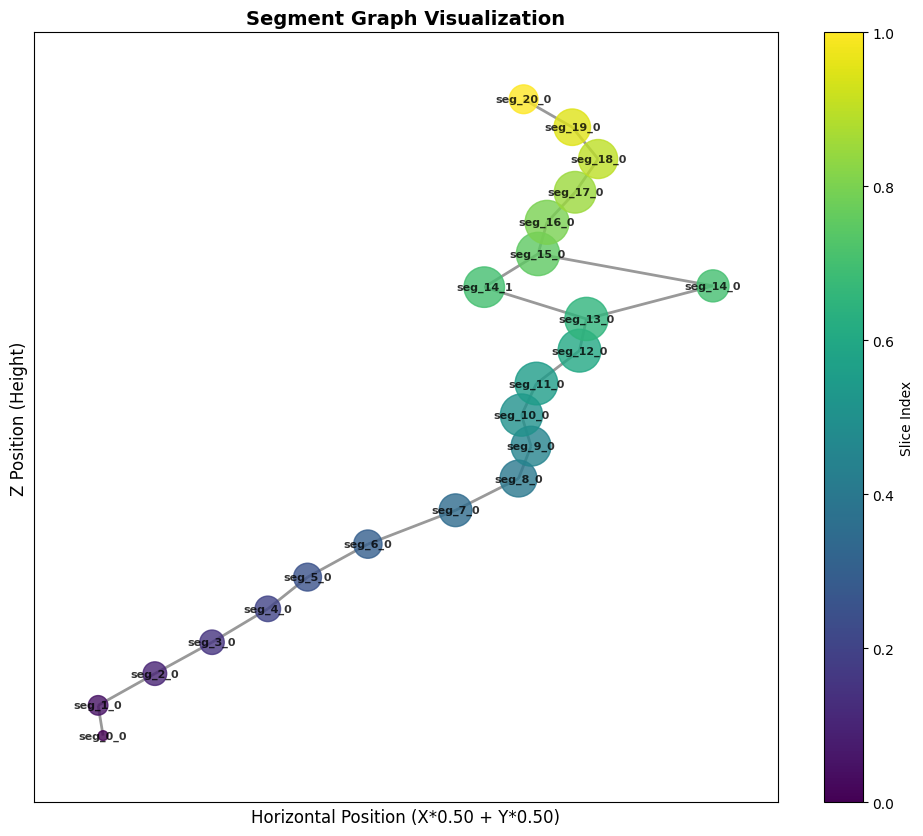

In [17]:
graph = segmenter.get_segment_graph()
_ = graph.visualize()